<a href='https://colab.research.google.com/github/fernandovieira1/FinScore/blob/main/FINSCORE.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

**# INTRUÇÕES**

* Antes de iniciar, certifique-se de estar logado na sua conta Google.

* Um botão azul 'Fazer login', localizado no canto superior direito da tela, aparecerá, se não.

* Feito isto, basta inserir os dados nas seções abaixo descritas:
    - 1.1 Cliente
    - 1.2 Período
    - 1.3 Score Serasa
    - 1.4 Lançamento dos dados Contábeis (na planilha indicada no link)

* Cada uma das seções mencionadas possui anotações sobre como proceder.

* Logo após, clique no menu 'Ambiente de execução' e em 'Executar tudo' (ou CTR + F9), nesta ordem.

##### 1. LANÇAMENTO DOS DADOS #####

##### 1.1 Cliente

*--> Insira o nome do cliente/empresa*

In [1]:
# Cliente
cliente = 'CARGOBR TRANSPORTES'

##### 1.2 Período

*--> Insira os anos inicial (a primeira) e final (da última) das demonstrações contábeis que serviram de base para a análise*

In [2]:
# Ano Inicial
ano_inicial = 2021

In [3]:
# Ano Final
ano_final = 2023

##### 1.3 Score Serasa

*--> Insira o score Serasa do cliente*

In [4]:
# Serasa
serasa = 550

##### 1.4 Lançamento dos dados Contábeis

*--> Acesse a planilha abaixo (CTRL + click) e insira as informações nas linhas e colunas respectivas*

In [5]:
# Lance do ano mais recente para o mais antigo
'https://docs.google.com/spreadsheets/d/1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33/edit?gid=1575975872#gid=1575975872'

'https://docs.google.com/spreadsheets/d/1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33/edit?gid=1575975872#gid=1575975872'

*--> Agora basta clicar no menu 'Ambiente de execução' e em 'Executar tudo' (ou CTR + F9), nesta ordem.*

##### CONFIGURAÇÃO DO AMBIENTE

##### Configuração do ambiente

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import subprocess
import importlib.util


In [7]:
%%capture
# Lista de pacotes necessários
required_packages = ['gspread', 'pandas', 'gspread_dataframe', 'openpyxl']

# Verificar e instalar pacotes que não estão instalados
def install_missing_packages(packages):
    for package in packages:
        if importlib.util.find_spec(package) is None:
            print(f'⚠ Instalando {package}...')
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', package])
        else:
            print(f'✔ {package} já está instalado')

install_missing_packages(required_packages)

In [8]:
# Definir o ID da planilha e da aba (worksheet)
sheet_id = '1-BCv3gjwJ34HZqjWpOQxqXU1q_3s3r33'
gid = '1575975872'  # ID da aba específica

# Construir a URL para baixar a planilha como um arquivo Excel (.xlsx)
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx&id={sheet_id}&gid={gid}'

# Ler a planilha diretamente no Pandas
df_dados_contabeis = pd.read_excel(url, engine='openpyxl')

In [9]:
# Função para calcular os índices contábeis
def calcular_indices_contabeis(df):
    indices = {}

    indices['Liquidez Corrente'] = df['Ativo Circulante'] / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Passivo Circulante: BP
    # => A liquidez corrente mede a capacidade da empresa de pagar suas obrigações de curto prazo.

    indices['Liquidez Seca'] = (df['Ativo Circulante'] - df['Estoques']) / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Estoque: BP
    # Passivo Circulante: BP
    # => A liquidez seca é uma medida de liquidez que desconsidera o estoque da empresa.

    indices['Margem Líquida'] = df['Lucro Líquido'] / df['Receita Total']
    # Lucro Líquido: DRE
    # Receita Total: DRE
    # => A margem líquida mede a porcentagem de lucro líquido que a empresa gera para cada real de receita.

    indices['ROA'] = df['Lucro Líquido'] / df['Ativo Total']
    # Lucro Líquido: DRE
    # Ativo Total: BP
    # => O retorno sobre ativos (ROA) mede a eficiência da empresa em gerar lucro a partir de seus ativos.

    indices['ROE'] = df['Lucro Líquido'] / df['Patrimônio Líquido']
    # Lucro Líquido: DRE
    # Patrimônio Líquido: BP
    # => O retorno sobre o patrimônio líquido (ROE) mede a eficiência da empresa em gerar lucro a partir de seu patrimônio líquido.

    indices['Endividamento'] = df['Passivo Total'] / df['Ativo Total']
    # Passivo Total: BP
    # Ativo Total: BP
    # => O endividamento mede a proporção de dívidas da empresa em relação ao total de ativos.

    indices['Cobertura de Juros'] = df['EBIT'] / df['Despesa de Juros']
    # EBIT: DRE (Lucro antes de juros e impostos)
    # Despesa de Juros: DRE
    # => A cobertura de juros mede a capacidade da empresa de pagar seus juros com seu lucro antes de juros e impostos.
    # => Reflete a capacidade de gerar resultados com suas atividades principais

    indices['Giro do Ativo'] = df['Receita Total'] / df['Ativo Total']
    # Ativo Total: BP
    # Receita Total: DRE
    # => O giro do ativo mede a eficiência da empresa em gerar receita a partir de seus ativos.

    indices['Período Médio de Recebimento'] = df['Contas a Receber'] / df['Receita Total'] * 365
    # Contas a Receber: BP
    # Receita Total: DRE
    # => O período médio de recebimento mede o tempo médio que a empresa leva para receber suas vendas.

    indices['Período Médio de Pagamento'] = df['Contas a Pagar'] / df['Custos'] * 365
    # Contas a Pagar: BP
    # Custos: DRE
    # => O período médio de pagamento mede o tempo médio que a empresa leva para pagar seus custos.

    return pd.DataFrame(indices)



##### Importação dos Dados Contábeis

In [10]:
## Importar os dados
# - Do mais recente para o mais antigo

# arquivo_dados_contabeis = '/content/dados_contabeis_global.xlsx'
arquivo_dados_contabeis = df_dados_contabeis

In [11]:
arquivo_dados_contabeis

,Ano,Ativo Circulante,Passivo Circulante,Estoques,Lucro Líquido,Receita Total,Ativo Total,Patrimônio Líquido,Passivo Total,EBIT,Despesa de Juros,Contas a Receber,Contas a Pagar,Custos
0,0,7285475.34,54559483.22,0,-571441.32,8.057296e+07,25346696.09,-42886164.95,68232861.04,927667.93,1499109.25,-649902.23,10658341.99,5.438481e+07
1,1,19291452.44,57383223.87,0,-11518730.97,1.323595e+08,27268069.47,-43314723.63,70582793.10,-10089092.61,1429638.36,16680207.53,10128070.74,1.141796e+08
2,2,37083837.78,53527346.56,0,-23069680.30,2.175741e+08,38085440.30,-38464111.72,76549552.02,-22174630.56,895049.74,34556084.72,15700962.93,1.850595e+08


##### Leitura dos Dados Contábeis

In [12]:
df_dados_contabeis = arquivo_dados_contabeis
print('Dados Contabeis Importados:')
print(df_dados_contabeis)

Dados Contabeis Importados:
   Ano  Ativo Circulante  Passivo Circulante  Estoques  Lucro Líquido  \
0    0        7285475.34         54559483.22         0     -571441.32   
1    1       19291452.44         57383223.87         0   -11518730.97   
2    2       37083837.78         53527346.56         0   -23069680.30   

   Receita Total  Ativo Total  Patrimônio Líquido  Passivo Total         EBIT  \
0   8.057296e+07  25346696.09        -42886164.95    68232861.04    927667.93   
1   1.323595e+08  27268069.47        -43314723.63    70582793.10 -10089092.61   
2   2.175741e+08  38085440.30        -38464111.72    76549552.02 -22174630.56   

   Despesa de Juros  Contas a Receber  Contas a Pagar        Custos  
0        1499109.25        -649902.23     10658341.99  5.438481e+07  
1        1429638.36       16680207.53     10128070.74  1.141796e+08  
2         895049.74       34556084.72     15700962.93  1.850595e+08  


##### 2. PROCESSAMENTO DO MODELO #####

##### 2.1 Índices contábeis

In [13]:
df_indices = calcular_indices_contabeis(df_dados_contabeis).round(2)
print('\nÍndices Contábeis Calculados:')


Índices Contábeis Calculados:


In [14]:
if (df_dados_contabeis['Estoques'] == 0).all():
        del df_indices['Liquidez Seca']

In [15]:
print(df_indices)

   Liquidez Corrente  Margem Líquida   ROA   ROE  Endividamento  \
0               0.13           -0.01 -0.02  0.01           2.69   
1               0.34           -0.09 -0.42  0.27           2.59   
2               0.69           -0.11 -0.61  0.60           2.01   

   Cobertura de Juros  Giro do Ativo  Período Médio de Recebimento  \
0                0.62           3.18                         -2.94   
1               -7.06           4.85                         46.00   
2              -24.77           5.71                         57.97   

   Período Médio de Pagamento  
0                       71.53  
1                       32.38  
2                       30.97  


##### 2.2 Padronização dos índices contábeis

In [16]:
# Escalar os índices contábeis para o PCA
scaler = StandardScaler()
indices_scaled = scaler.fit_transform(df_indices)
print('\nÍndices Escalados para PCA:')
print(indices_scaled)


Índices Escalados para PCA:
[[-1.1111678   1.38873015  1.34201054 -1.17355861  0.86730936  1.03684596
  -1.33286998 -1.38967907  1.41355026]
 [-0.20203051 -0.46291005 -0.2846689  -0.096646    0.53372883  0.31447127
   0.2570535   0.46769627 -0.66926843]
 [ 1.31319831 -0.9258201  -1.05734164  1.27020461 -1.40103819 -1.35131723
   1.07581649  0.9219828  -0.74428183]]


##### 2.3 Cálculo do PCA

In [17]:
# Realizar o PCA
pca = PCA()
pca_result = pca.fit_transform(indices_scaled)
print('\nComponentes Principais (PCA):')
print(pca_result)

#relatório



Componentes Principais (PCA):
[[-3.69177261e+00 -4.95441342e-01  2.47908379e-16]
 [ 3.41844590e-01  1.15979151e+00  2.47908379e-16]
 [ 3.34992802e+00 -6.64350164e-01  2.47908379e-16]]


##### 2.4 Variância Explicada PCA

In [18]:
# Variância explicada pelos componentes principais
explained_variance_ratio = pca.explained_variance_ratio_
print('\nVariância Explicada por Componente:')
print(explained_variance_ratio)

#relatório


Variância Explicada por Componente:
[9.24742978e-01 7.52570222e-02 6.82872938e-33]


##### 2.5 DataFrame PCA

In [19]:
# DataFrame com os componentes principais
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
print('\nMatriz de Componentes Principais:')
print(pca_df)

#relatório


Matriz de Componentes Principais:
        PC1       PC2           PC3
0 -3.691773 -0.495441  2.479084e-16
1  0.341845  1.159792  2.479084e-16
2  3.349928 -0.664350  2.479084e-16


##### 2.6 Matriz de cargas

In [20]:
# Obter a matriz de cargas
loadings = pd.DataFrame(
    pca.components_,
    columns=df_indices.columns,
    index=[f'PC{i+1}' for i in range(pca.components_.shape[0])]
)

print('Matriz de Cargas dos Componentes Principais:')
print(loadings)

# Identificar os índices mais significativos para cada PC
print('\nÍndices mais significativos por componente:')
for pc in loadings.index:
    print(f'\n{pc}:')
    print(loadings.loc[pc].abs().sort_values(ascending=False).head(3))  # Top 3 índices mais significativos

#relatório

Matriz de Cargas dos Componentes Principais:
     Liquidez Corrente  Margem Líquida       ROA       ROE  Endividamento  \
PC1           0.337721       -0.335891 -0.344189  0.342620      -0.308908   
PC2          -0.273738       -0.300129 -0.144000 -0.184317       0.551243   
PC3           0.847660        0.003513  0.209232 -0.363568       0.198277   

     Cobertura de Juros  Giro do Ativo  Período Médio de Recebimento  \
PC1           -0.330307       0.344938                      0.335582   
PC2            0.368501       0.119968                      0.304347   
PC3            0.128722      -0.131690                      0.179649   

     Período Médio de Pagamento  
PC1                   -0.318030  
PC2                   -0.483321  
PC3                   -0.001238  

Índices mais significativos por componente:

PC1:
Giro do Ativo    0.344938
ROA              0.344189
ROE              0.342620
Name: PC1, dtype: float64

PC2:
Endividamento                 0.551243
Período Médio de Paga

##### 2.7 Escore final

In [21]:
pca_df.dot(explained_variance_ratio)

0   -3.451226
1    0.403401
2    3.047825
dtype: float64

##### 3. RESULTADOS #####

##### 3.1A FINSCORE BRUTO

In [22]:
# Função para categorizar escores consolidados com mais granularidade
def categorias_finscore_bruto(escores):
    categorias = []
    for escore in escores:
        if finscore_bruto > 1.5:
            categorias.append('Muito Abaixo do Risco')
        elif 1.0 < escore <= 1.5:
            categorias.append('Levemente Abaixo do Risco')
        elif -1.0 <= escore <= 1.0:
            categorias.append('Neutro')
        elif -1.5 < escore < -1.0:
            categorias.append('Levemente Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias

# Tabela de Categorias:
# -------------------------------------------------------
# |   Intervalo do Escore   |      Categoria            |
# -------------------------------------------------------
# |  escore > 1.5           | Muito Abaixo do Risco     |
# |  1.0 < escore ≤ 1.5     | Levemente Abaixo do Risco |
# | -1.0 ≤ escore ≤ 1.0     | Neutro                    |
# | -1.5 < escore < -1.0    | Levemente Acima do Risco  |
# |  escore ≤ -1.5          | Muito Acima do Risco      |
# -------------------------------------------------------

In [23]:
# Calcular o escore consolidado com penalização do último ano
# Do mais recente para o mais antigo: 0.5, 0.3, 0.2
pesos = [0.6, 0.25, 0.15]  # Pesos para os três anos
finscore_bruto = round((pca_df.dot(explained_variance_ratio) * pesos).sum(), 2)
print('\nFINSCORE BRUTO:')
print(finscore_bruto)
print('\nCLASSIFICAÇÃO FINSCORE BRUTO:')
print(categorias_finscore_bruto([finscore_bruto])[0])



FINSCORE BRUTO:
-1.51

CLASSIFICAÇÃO FINSCORE BRUTO:
Muito Acima do Risco


##### 3.1B FINSCORE AJUSTADO

In [24]:
# Função para categorizar escores consolidados com mais granularidade
def categorias_finscore_ajustado(escores):
    categorias = []
    for escore in escores:
        if escore > 750:
            categorias.append('Muito Abaixo do Risco')
        elif 500 < escore <= 750:
            categorias.append('Levemente Abaixo do Risco')
        elif 250 <= escore <= 500:
            categorias.append('Neutro')
        elif 100 < escore < 250:
            categorias.append('Levemente Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias

# Tabela de Categorias:
# -------------------------------------------------------
# |   Intervalo do Escore  |      Categoria            |
# -------------------------------------------------------
# |  escore > 750          | Muito Abaixo do Risco     |
# |  500 < escore ≤ 750    | Levemente Abaixo do Risco |
# | 250 ≤ escore ≤ 500     | Neutro                    |
# | 100 < escore < 250     | Levemente Acima do Risco  |
# |  escore ≤ 250          | Muito Acima do Risco      |
# -------------------------------------------------------

In [25]:
# Traduz a tendência em um escore de risco ajustado ao ponto de referência atual do cliente.
finscore_ajustado = round(min(((finscore_bruto + 2)/4)*1000, 1000), 2)

In [26]:
print('\nFINSCORE AJUSTADO:')
print(finscore_ajustado)
print('\nCLASSIFICAÇÃO FINSCORE AJUSTADO:')
print(categorias_finscore_ajustado([finscore_ajustado])[0])


FINSCORE AJUSTADO:
122.5

CLASSIFICAÇÃO FINSCORE AJUSTADO:
Levemente Acima do Risco


##### 3.1C FINSCORE FINAL

In [27]:
# Função para categorizar escores consolidados com mais granularidade
def categorias_finscore_final(escores):
    categorias = []
    for escore in escores:
        if escore > 750:
            categorias.append('Muito Abaixo do Risco')
        elif 500 < escore <= 750:
            categorias.append('Levemente Abaixo do Risco')
        elif 250 <= escore <= 500:
            categorias.append('Neutro')
        elif 100 < escore < 250:
            categorias.append('Levemente Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias

# Tabela de Categorias:
# -------------------------------------------------------
# |   Intervalo do Escore  |      Categoria            |
# -------------------------------------------------------
# |  escore > 750          | Muito Abaixo do Risco     |
# |  500 < escore ≤ 750    | Levemente Abaixo do Risco |
# | 250 ≤ escore ≤ 500     | Neutro                    |
# | 100 < escore < 250     | Levemente Acima do Risco  |
# |  escore ≤ 250          | Muito Acima do Risco      |
# -------------------------------------------------------

In [28]:
finscore_final = min(round(((serasa + finscore_ajustado) / 2) + ((serasa * finscore_ajustado)/1000), 2), 1000)


In [29]:
print('\nFINSCORE FINAL:')
print(finscore_final)
print('\nCLASSIFICAÇÃO FINSCORE FINAL:')
print(categorias_finscore_final([finscore_final])[0])



FINSCORE FINAL:
403.62

CLASSIFICAÇÃO FINSCORE FINAL:
Neutro


##### 3.2 SERASA

In [30]:
# Função para categorizar escores conforme a classificação do Serasa
def categorias_serasa(escores):
    categorias = []
    for escore in escores:
        if escore >= 701:
            categorias.append('Excelente')
        elif 501 <= escore <= 700:
            categorias.append('Bom')
        elif 301 <= escore <= 500:
            categorias.append('Baixa')
        else:
            categorias.append('Muito Baixa')
    return categorias

# Tabela de Categorias:
# ---------------------------------
# |   Intervalo do Escore  | Categoria  |
# ---------------------------------
# |  701 a 1.000          | Excelente  |
# |  501 a 700            | Bom        |
# |  301 a 500            | Baixo      |
# |  0 a 300              | Muito Baixo|
# ---------------------------------

In [31]:
print('\nSERASA:')
print(serasa)
print('\nCLASSIFICAÇÃO SERASA:')
print(categorias_serasa([serasa])[0])


SERASA:
550

CLASSIFICAÇÃO SERASA:
Bom


##### 3.3 Valores e Contas Contábeis

In [32]:
df_dados_contabeis
# Sendo 0 o mais recente e 2 o mais antigo

,Ano,Ativo Circulante,Passivo Circulante,Estoques,Lucro Líquido,Receita Total,Ativo Total,Patrimônio Líquido,Passivo Total,EBIT,Despesa de Juros,Contas a Receber,Contas a Pagar,Custos
0,0,7285475.34,54559483.22,0,-571441.32,8.057296e+07,25346696.09,-42886164.95,68232861.04,927667.93,1499109.25,-649902.23,10658341.99,5.438481e+07
1,1,19291452.44,57383223.87,0,-11518730.97,1.323595e+08,27268069.47,-43314723.63,70582793.10,-10089092.61,1429638.36,16680207.53,10128070.74,1.141796e+08
2,2,37083837.78,53527346.56,0,-23069680.30,2.175741e+08,38085440.30,-38464111.72,76549552.02,-22174630.56,895049.74,34556084.72,15700962.93,1.850595e+08


##### 3.4 Índices contábeis

In [33]:
print(df_indices)
# Sendo 0 o mais recente e 2 o mais antigo


   Liquidez Corrente  Margem Líquida   ROA   ROE  Endividamento  \
0               0.13           -0.01 -0.02  0.01           2.69   
1               0.34           -0.09 -0.42  0.27           2.59   
2               0.69           -0.11 -0.61  0.60           2.01   

   Cobertura de Juros  Giro do Ativo  Período Médio de Recebimento  \
0                0.62           3.18                         -2.94   
1               -7.06           4.85                         46.00   
2              -24.77           5.71                         57.97   

   Período Médio de Pagamento  
0                       71.53  
1                       32.38  
2                       30.97  


##### 4. APRESENTAÇÃO #####

##### 4.1 Criação dos dfs

In [34]:
 categorias_serasa([serasa])[0]

'Bom'

In [35]:
# Df resultados principais
resultados_df = pd.DataFrame({
    'Métrica': ['Finscore Bruto', 'Finscore Ajustado', 'Finscore', 'Serasa'],
    'Valor': [finscore_bruto, finscore_ajustado, finscore_final, serasa],
    'Cateegoria': [categorias_finscore_bruto([finscore_bruto])[0], 
                   categorias_finscore_ajustado([finscore_ajustado])[0], 
                   categorias_finscore_final([finscore_final])[0],
                   categorias_serasa([serasa])[0]]
                   
})
resultados_df

,Métrica,Valor,Cateegoria
0,Finscore Bruto,-1.51,Muito Acima do Risco
1,Finscore Ajustado,122.50,Levemente Acima do Risco
2,Finscore,403.62,Neutro
3,Serasa,550.00,Bom


##### 4.2 Tabela Resumo

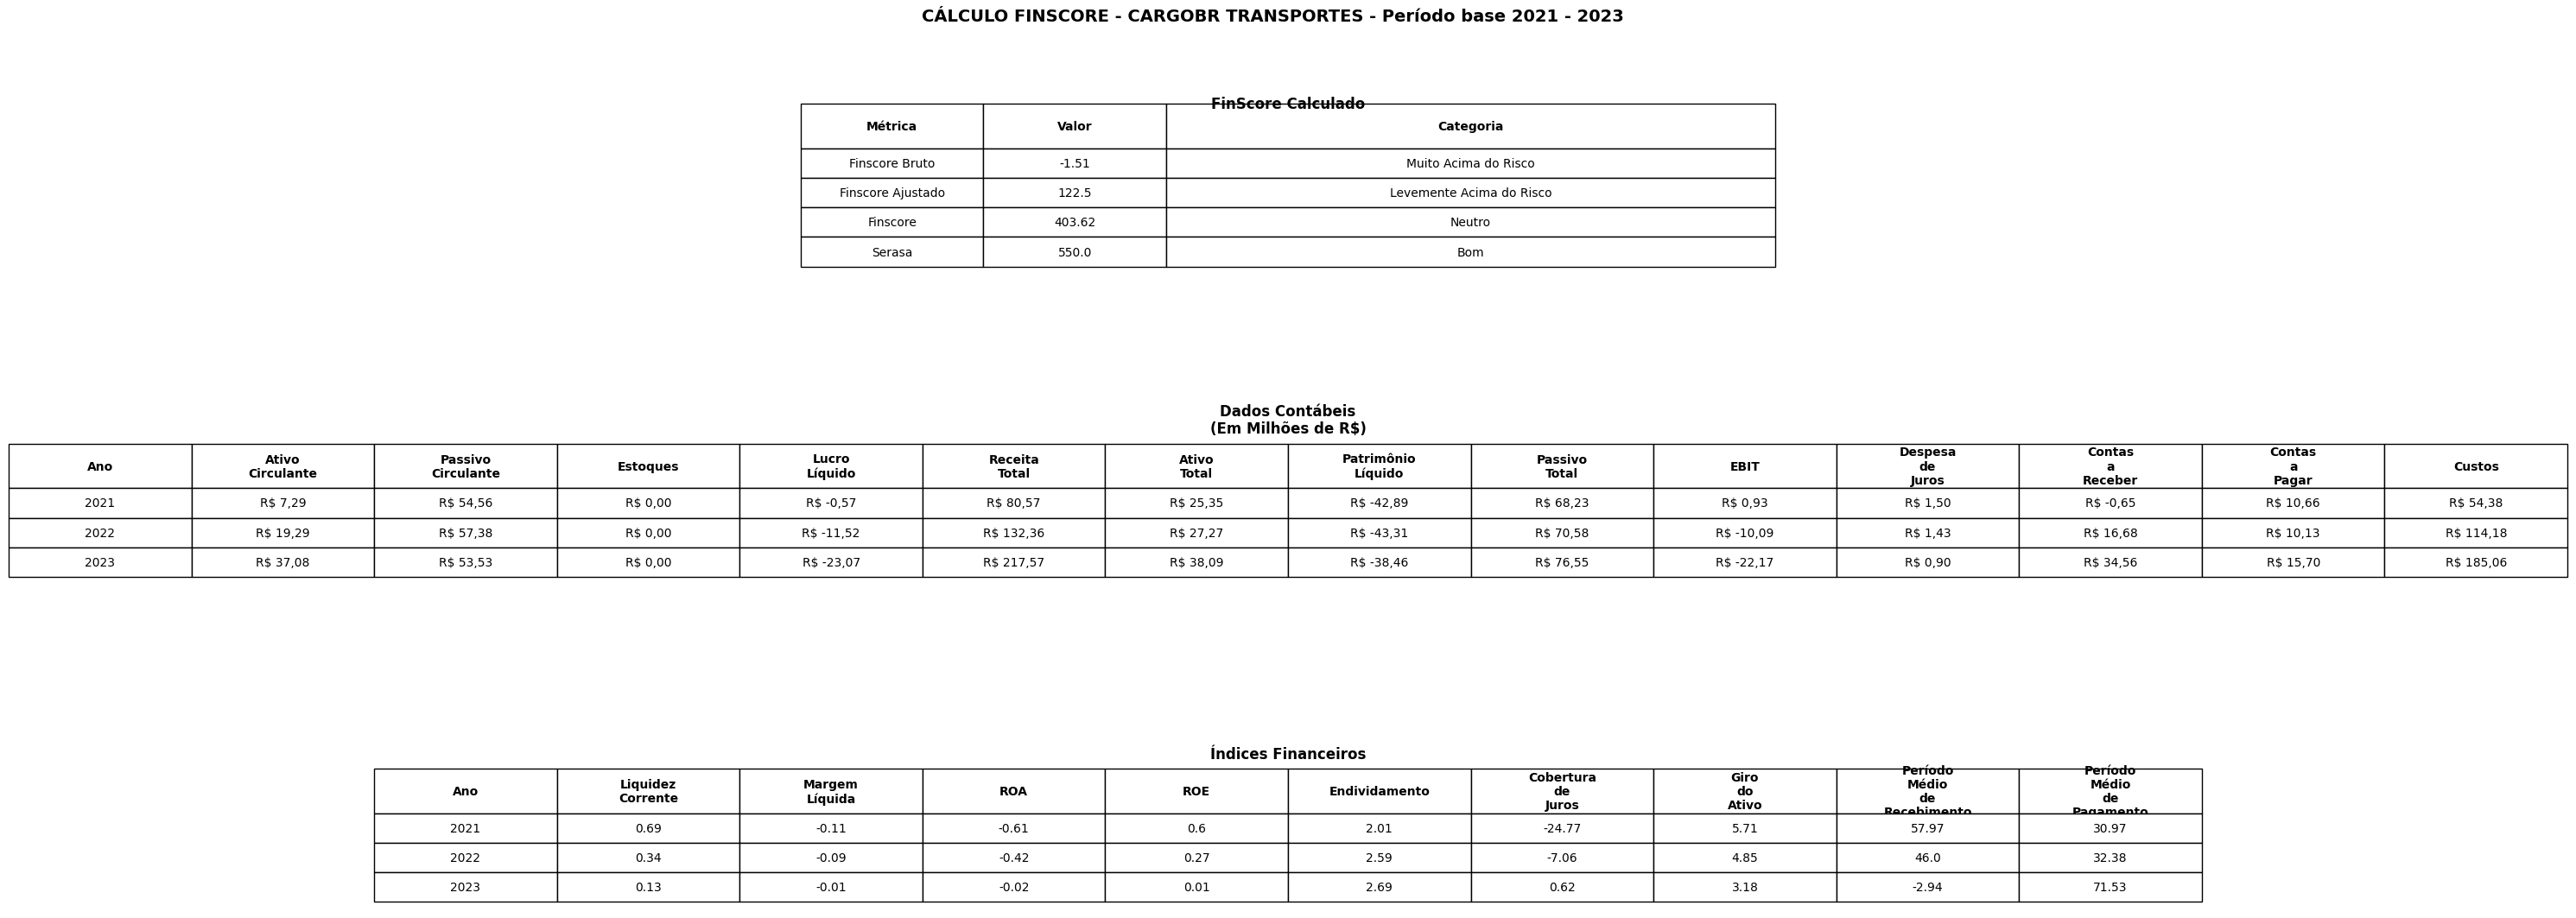

In [36]:

# --- Ajuste principal: inverter a ordem do df_indices se necessário ---
df_indices = df_indices.iloc[::-1].reset_index(drop=True)

## FORMATAR PADRÃO BR
# Cópia do df original
df_dados_contabeis_milhoes = df_dados_contabeis.copy()

# Excluindo a coluna 'Ano' antes de realizar as transformações
df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.drop(columns=['Ano'])

# Dividindo os valores das colunas numéricas por 1.000.000
for col in df_dados_contabeis_milhoes.select_dtypes(include=['float64', 'int64']).columns:
    df_dados_contabeis_milhoes[col] = df_dados_contabeis_milhoes[col] / 1_000_000

# Formatando os valores para o padrão brasileiro (R$ 1.000.000,00)
df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.map(
    lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    if isinstance(x, (int, float)) else x
)

## INSERIR A COLUNA 'ANO' NAS TABELAS 'Dados Contábeis' e 'Índices Financeiros'
anos = list(map(str, range(ano_inicial, ano_final + 1)))  # Criando lista correta de anos

# Ajustando tamanho das listas de anos conforme o número de linhas nos DataFrames
df_dados_contabeis_milhoes.insert(0, 'Ano', anos[:len(df_dados_contabeis_milhoes)])
df_indices.insert(0, 'Ano', anos[:len(df_indices)])

## DF RESULTADOS PRINCIPAIS
resultados_df = pd.DataFrame({
    'Métrica': ['Finscore Bruto', 'Finscore Ajustado', 'Finscore', 'Serasa'],
    'Valor': [finscore_bruto, finscore_ajustado, finscore_final, serasa],
    'Categoria': [
        categorias_finscore_bruto([finscore_bruto])[0],
        categorias_finscore_ajustado([finscore_ajustado])[0],
        categorias_finscore_final([finscore_final])[0],
        categorias_serasa([serasa])[0]
    ]
})

## INSERINDO QUEBRA DE LINHA NOS CABEÇALHOS
df_dados_contabeis_milhoes.columns = [col.replace(' ', '\n') for col in df_dados_contabeis_milhoes.columns]
df_indices.columns = [col.replace(' ', '\n') for col in df_indices.columns]
resultados_df.columns = [col.replace(' ', '\n') for col in resultados_df.columns]

## CABEÇALHO
fig, axs = plt.subplots(nrows=3, figsize=(14, 12))

# Ajustando o espaçamento entre os subplots
plt.subplots_adjust(hspace=1.2)  # Aumentando a separação entre as tabelas

fig.suptitle(
    f'CÁLCULO FINSCORE - {cliente} - Período base {ano_inicial} - {ano_final}',
    fontsize=14, fontweight='bold'
)

## TABELAS
def add_table(ax, df, title, top_padding=0.5):
    ax.axis('tight')
    ax.axis('off')

    # Ajuste dinâmico da largura das colunas
    num_cols = len(df.columns)
    col_widths = [0.15] * num_cols  # Largura padrão
    if 'Categoria' in df.columns:
        col_widths[-1] = 0.5  # Maior largura para 'Categoria'

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center', loc='center',
        colWidths=col_widths
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.3, 1.3)  # Ajustando escala para melhor legibilidade
    
    # Aumentando a altura da linha do cabeçalho
    for col in range(len(df.columns)):
        table[(0, col)].set_height(0.3)
    
    # Destacando o cabeçalho com negrito
    for key, cell in table._cells.items():
        if key[0] == 0:  # Se for a primeira linha (cabeçalho)
            cell.set_fontsize(10)
            cell.set_text_props(weight='bold')
        else:
            cell.set_text_props(ha='center', va='center', wrap=True)  # Ajuste para quebras de linha
            cell.set_height(0.2)  # Aumentando altura para melhor ajuste de texto

    # Ajustar a posição do título para ficar mais centralizado
    ax.set_title(title, fontsize=12, fontweight='bold', pad=top_padding)
    ax.title.set_y(1.1)  # Levando o título um pouco para cima

# Adicionando cada tabela com ajuste fino do título
add_table(axs[0], resultados_df, 'FinScore Calculado', top_padding=1.0)
add_table(axs[1], df_dados_contabeis_milhoes, 'Dados Contábeis\n(Em Milhões de R$)', top_padding=1.5)
add_table(axs[2], df_indices, 'Índices Financeiros', top_padding=1.5)

plt.show()


#### 5. Prompt IA

In [38]:
print('Faça um parecer em língua portuguesa com base no prompt abaixo, pronto para ser copiado e colado em um processador de texto (word, libreoffice ou google docs):')

print('\n========================== INÍCIO ==========================')

print('- Gere um relatório detalhado de análise de crédito para o cliente abaixo, considerando sua situação financeira com base nos dados contábeis, índices financeiros e classificação final do FinScore.')

# **1️⃣ Introdução**
print('\n1️⃣ INTRODUÇÃO:')
print('--------------------------------------')
print('Este parecer tem como objetivo fornecer uma análise detalhada da situação financeira da empresa analisada, utilizando os demonstrativos financeiros disponíveis.')
print(f'Nome da Empresa: {cliente}')
print(f'Período da Análise: {ano_inicial} - {ano_final}')
print('Serão avaliados os dados contábeis, índices financeiros e scores de risco para apresentar um veredito sobre a viabilidade da concessão de crédito à empresa.')

# **2️⃣ Metodologia**
print('\n2️⃣ METODOLOGIA:')
print('--------------------------------------')
print('A análise financeira desta empresa segue as diretrizes metodológicas do FinScore, conforme descrito no documento de referência.')

print('\n🔹 **O que é o FinScore e como ele é calculado?**')
print('O FinScore é um indicador consolidado que avalia a saúde financeira da empresa com base em índices financeiros e técnicas estatísticas avançadas. Ele pode ser apresentado em três versões:')

print('- **FinScore Bruto:** Obtido diretamente a partir da soma ponderada dos componentes principais do PCA (Análise de Componentes Principais). Seu valor original está na faixa de -2 a +2.')
print('- **FinScore Ajustado:** Transformação do FinScore Bruto para uma escala mais intuitiva de 0 a 1000.')
print('- **FinScore Final:** Combinação do FinScore Ajustado com o Serasa Score, aplicando uma ponderação específica para refletir tanto a análise contábil quanto o risco de crédito do mercado.')

# **Tabelas de Classificação do FinScore**
print('\n🔹 **Classificação do FinScore Bruto**')
print('-------------------------------------------------------')
print('|   Intervalo do Escore   |      Categoria            |')
print('-------------------------------------------------------')
print('|  escore > 1.5           | Muito Abaixo do Risco     |')
print('|  1.0 < escore ≤ 1.5     | Levemente Abaixo do Risco |')
print('| -1.0 ≤ escore ≤ 1.0     | Neutro                    |')
print('| -1.5 < escore < -1.0    | Levemente Acima do Risco  |')
print('|  escore ≤ -1.5          | Muito Acima do Risco      |')
print('-------------------------------------------------------')

print('\n🔹 **Classificação do FinScore Ajustado**')
print('-------------------------------------------------------')
print('|   Intervalo do Escore  |      Categoria            |')
print('-------------------------------------------------------')
print('|  escore > 750          | Muito Abaixo do Risco     |')
print('|  500 < escore ≤ 750    | Levemente Abaixo do Risco |')
print('| 250 ≤ escore ≤ 500     | Neutro                    |')
print('| 100 < escore < 250     | Levemente Acima do Risco  |')
print('|  escore ≤ 100          | Muito Acima do Risco      |')
print('-------------------------------------------------------')

print('\n🔹 **Classificação do FinScore Final**')
print('-------------------------------------------------------')
print('|   Intervalo do Escore  |      Categoria            |')
print('-------------------------------------------------------')
print('|  escore > 750          | Muito Abaixo do Risco     |')
print('|  500 < escore ≤ 750    | Levemente Abaixo do Risco |')
print('| 250 ≤ escore ≤ 500     | Neutro                    |')
print('| 100 < escore < 250     | Levemente Acima do Risco  |')
print('|  escore ≤ 100          | Muito Acima do Risco      |')
print('-------------------------------------------------------')

print('\n🔹 **Papel do Serasa Score na Análise**')
print('O Serasa Score é um indicador de crédito baseado no histórico financeiro da empresa. Ele complementa o FinScore, permitindo avaliar não apenas a estrutura financeira, mas também o comportamento de pagamento no mercado.')

# **3️⃣ Análise dos Dados Contábeis**
print('\n3️⃣ ANÁLISE DOS DADOS CONTÁBEIS:')
print('--------------------------------------')
print('Os seguintes dados contábeis foram extraídos para a análise financeira:')
print(df_dados_contabeis)
print("""
Monte a tabela com todos os valores listados em 'df_dados_contabeis' e critique cada uma das contas a seguir de forma contextualizada 
em relação aos objetivos deste trabalho: Ativo Circulante, Passivo Circulante, Estoques, Lucro Líquido, Receita Total, Ativo Total, 
Patrimônio Líquido, Passivo Total, EBIT, Despesa de Juros, Contas a Receber, Contas a Pagar, Custos""")

print('\n🔎 **Interprete sobretudo os valores apresentados a seguir e critique-os:**')
print('- Como está a relação entre **Ativo Circulante** e **Passivo Circulante**? A empresa tem liquidez suficiente?')
print('- O **Lucro Líquido** está positivo ou negativo? Se negativo, quais são os impactos financeiros?')
print('- A empresa está altamente alavancada? O **Endividamento** indica que a empresa depende muito de capital de terceiros?')

# **4️⃣ Análise dos Índices Financeiros**
print('\n4️⃣ ANÁLISE DOS ÍNDICES FINANCEIROS:')
print('--------------------------------------')
print('Os índices financeiros são fundamentais para avaliar a liquidez, rentabilidade e estrutura de capital da empresa.')
print(df_indices)
print("""
Monte a tabela com todos os valores listados em 'df_indices' e critique ums por um dos valores a seguir de forma 
contextualizada em relação aos objetivos deste trabalho: Liquidez Corrente, Liquidez Seca, Margem Líquida, ROA, ROE, Endividamento,
Cobertura de Juros, Giro do Ativo, Período Médio de Recebimento, Período Médio de Pagamento""")

print('\n🔎 **Critique e interprete sobretudo estes índices:**')
print('- **Liquidez Corrente e Seca:** Índices abaixo de 1 podem indicar risco de liquidez.')
print('- **Margem Líquida:** Se for muito baixa, pode comprometer a rentabilidade no longo prazo.')
print('- **ROA e ROE:** Retornos negativos sugerem que os ativos ou o patrimônio não estão gerando lucro suficiente.')
print('- **Endividamento e Cobertura de Juros:** Alto endividamento com baixa cobertura de juros pode indicar risco elevado.')

# **5️⃣ Análise dos FinScores e Serasa Score**
print('\n5️⃣ ANÁLISE DOS FINSCORES E SERASA SCORE:')
print('--------------------------------------')
print(f'- **Finscore Bruto:** {finscore_bruto:.2f} | **Categoria:** {categorias_finscore_bruto}')
print(f'- **Finscore Ajustado:** {finscore_ajustado:.2f} | **Categoria:** {categorias_finscore_ajustado}')
print(f'- **Finscore Final:** {finscore_final:.2f} | **Categoria:** {categorias_finscore_final}')
print(f'- **Serasa Score:** {serasa:.2f} | **Categoria:** {categorias_serasa}')
print('Com base nos conceito de cada um dos finscores e do serasa score, qual a sua avaliação sobre a situação financeira da empresa?')
print('Reflita com parcimômia e acurácia técnica com base em todos os conceitos, informações auferidas e nos objetivos e propósitos desta metodologia.')

# **6️⃣ Veredicto Final**
print('\n6️⃣ VEREDICTO FINAL:')
print('--------------------------------------')
print('O **FinScore Final** é o parâmetro definitivo da análise, pois sintetiza todos os índices e informações disponíveis.')
print('baseado em tudo o que foi registrado e analisado, qual a sua opinião final para a concessão de crédito a esta empresa? Com base em quais informações você chegou a essa conclusão?')

# **7️⃣ Recomendações para Mitigação de Riscos**
print('\n7️⃣ RECOMENDAÇÕES PARA MITIGAÇÃO DE RISCOS:')
print('--------------------------------------')
print('- Implementação de garantias reais, como recebíveis ou bens ativos.')
print('- Estabelecimento de um limite de crédito condizente com a capacidade de pagamento.')
print('- Monitoramento contínuo dos indicadores financeiros da empresa.')

print('\n========================== FIM ==========================')


Faça um parecer em língua portuguesa com base no prompt abaixo, pronto para ser copiado e colado em um processador de texto (word, libreoffice ou google docs):

========================== INÍCIO ==========================
- Gere um relatório detalhado de análise de crédito para o cliente abaixo, considerando sua situação financeira com base nos dados contábeis, índices financeiros e classificação final do FinScore.

1️⃣ INTRODUÇÃO:
--------------------------------------
Este parecer tem como objetivo fornecer uma análise detalhada da situação financeira da empresa analisada, utilizando os demonstrativos financeiros disponíveis.
Nome da Empresa: CARGOBR TRANSPORTES
Período da Análise: 2021 - 2023
Serão avaliados os dados contábeis, índices financeiros e scores de risco para apresentar um veredito sobre a viabilidade da concessão de crédito à empresa.

2️⃣ METODOLOGIA:
--------------------------------------
A análise financeira desta empresa segue as diretrizes metodológicas do FinScore,